# Intelligent Irrigation System

## EA want to build an Automatic irrigation system that measures the moisture of soil and helps to take the decision to turn on or off the water supply.

## Can You Help Him??

# //////////////////....................................////////////////////////////...............//////////////////////////

# Naive Bayes Intelligent Irrigation system 

## importing the required libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import the dataset

In [9]:
dataset=pd.read_csv('Irrigation_system.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

## Dataset Analysis 

In [12]:
dataset.head(10)

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


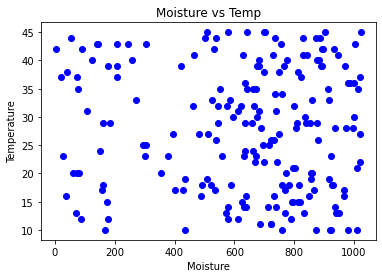

In [26]:
x=dataset["moisture"]
y=dataset["temp"]
plt.scatter(x,y,color='blue')
plt.title('Moisture vs Temp')
plt.xlabel('Moisture')
plt.ylabel('Temperature')
plt.show()

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
print(X_train)

[[ 637   29]
 [ 175   15]
 [ 888   44]
 [ 837   30]
 [  74   20]
 [ 736   44]
 [ 661   35]
 [ 926   18]
 [ 698   45]
 [ 535   17]
 [ 209   43]
 [ 553   35]
 [ 872   10]
 [ 783   18]
 [1019   37]
 [ 795   15]
 [ 580   14]
 [ 922   23]
 [ 663   24]
 [ 699   22]
 [ 178   39]
 [ 850   16]
 [  72   13]
 [  76   35]
 [  59   20]
 [ 545   29]
 [ 168   10]
 [ 703   45]
 [ 714   14]
 [  39   38]
 [ 974   28]
 [ 824   37]
 [   4   42]
 [ 941   13]
 [ 482   27]
 [ 659   29]
 [ 741   22]
 [ 788   12]
 [  87   12]
 [ 894   42]
 [ 749   38]
 [ 671   23]
 [ 914   35]
 [ 611   12]
 [ 902   45]
 [1005   43]
 [1010   10]
 [ 354   20]
 [ 817   18]
 [ 306   25]
 [ 865   17]
 [ 986   36]
 [ 775   40]
 [ 638   16]
 [ 830   44]
 [ 208   39]
 [ 843   41]
 [ 641   35]
 [1001   36]
 [ 675   39]
 [ 509   19]
 [ 533   42]
 [ 740   31]
 [ 737   34]
 [ 586   33]
 [ 923   10]
 [ 813   15]
 [ 917   33]
 [ 302   23]
 [ 635   36]
 [ 716   25]
 [ 683   39]
 [ 493   18]
 [ 639   14]
 [  89   42]
 [ 539   26]
 [ 798   32]

In [33]:
print(y_train)

[1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1]


In [35]:
print(X_test)

[[ 633   23]
 [ 873   44]
 [ 177   12]
 [ 588   18]
 [ 859   20]
 [ 878   29]
 [ 558   23]
 [ 143   43]
 [ 507   45]
 [ 981   36]
 [ 729   41]
 [ 293   25]
 [ 893   39]
 [ 876   40]
 [ 697   25]
 [ 673   35]
 [ 803   21]
 [  75   37]
 [ 687   11]
 [ 574   32]
 [ 883   40]
 [ 206   37]
 [ 748   27]
 [ 920   10]
 [ 513   27]
 [  26   23]
 [ 937   28]
 [1009   21]
 [ 124   40]
 [ 537   44]
 [ 724   11]
 [ 632   14]
 [ 861   33]
 [ 162   29]
 [ 636   24]
 [ 918   19]
 [ 466   41]
 [ 690   28]
 [ 734   16]
 [ 379   23]
 [ 141   43]
 [ 739   14]
 [ 808   29]
 [ 394   27]
 [ 930   18]
 [ 629   41]
 [ 642   45]
 [ 623   32]
 [ 435   10]
 [  21   37]]


In [36]:
print(y_test)

[1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0]


# Feature Scaling 

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print(X_train)

[[-0.02646906  0.14049224]
 [-1.68948442 -1.14226299]
 [ 0.87703063  1.51487285]
 [ 0.69345101  0.23211761]
 [-2.05304406 -0.68413612]
 [ 0.32989137  1.51487285]
 [ 0.05992135  0.69024448]
 [ 1.01381544 -0.86738687]
 [ 0.19310656  1.60649822]
 [-0.3936283  -0.95901225]
 [-1.56709801  1.42324747]
 [-0.32883549  0.69024448]
 [ 0.81943702 -1.60038986]
 [ 0.49907259 -0.86738687]
 [ 1.34857827  0.87349523]
 [ 0.54226779 -1.14226299]
 [-0.23164628 -1.23388837]
 [ 0.99941704 -0.40926   ]
 [ 0.06712055 -0.31763463]
 [ 0.19670616 -0.50088538]
 [-1.67868562  1.05674598]
 [ 0.74024581 -1.05063762]
 [-2.06024326 -1.32551374]
 [-2.04584486  0.69024448]
 [-2.10703806 -0.68413612]
 [-0.35763229  0.14049224]
 [-1.71468162 -1.60038986]
 [ 0.21110456  1.60649822]
 [ 0.25070017 -1.23388837]
 [-2.17903007  0.9651206 ]
 [ 1.18659626  0.04886687]
 [ 0.6466562   0.87349523]
 [-2.30501608  1.3316221 ]
 [ 1.06780944 -1.32551374]
 [-0.58440712 -0.04275851]
 [ 0.05272215  0.14049224]
 [ 0.34788938 -0.50088538]
 

In [39]:
print(y_train)

[1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1]


In [40]:
print(X_test)

[[-0.04086746 -0.40926   ]
 [ 0.82303662  1.51487285]
 [-1.68228522 -1.41713912]
 [-0.20284948 -0.86738687]
 [ 0.77264222 -0.68413612]
 [ 0.84103462  0.14049224]
 [-0.31083749 -0.40926   ]
 [-1.80467163  1.42324747]
 [-0.49441711  1.60649822]
 [ 1.21179346  0.78186986]
 [ 0.30469417  1.23999673]
 [-1.26473158 -0.22600926]
 [ 0.89502863  1.05674598]
 [ 0.83383542  1.14837135]
 [ 0.18950696 -0.22600926]
 [ 0.10311655  0.69024448]
 [ 0.5710646  -0.59251075]
 [-2.04944446  0.87349523]
 [ 0.15351096 -1.50876449]
 [-0.25324388  0.41536836]
 [ 0.85903262  1.14837135]
 [-1.57789681  0.87349523]
 [ 0.37308658 -0.04275851]
 [ 0.99221784 -1.60038986]
 [-0.4728195  -0.04275851]
 [-2.22582487 -0.40926   ]
 [ 1.05341104  0.04886687]
 [ 1.31258227 -0.59251075]
 [-1.87306404  1.14837135]
 [-0.3864291   1.51487285]
 [ 0.28669617 -1.50876449]
 [-0.04446706 -1.23388837]
 [ 0.77984142  0.50699374]
 [-1.73627923  0.14049224]
 [-0.03006866 -0.31763463]
 [ 0.98501864 -0.7757615 ]
 [-0.64200072  1.23999673]
 

In [41]:
print(y_test)

[1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0]


# Training the model

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting Future data

In [46]:
print(classifier.predict(sc.transform([[500,32]])))

[1]


## Predicting Test Set Data

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]]


## Confussion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  1]
 [ 0 36]]


0.98

## Visualisation of train set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


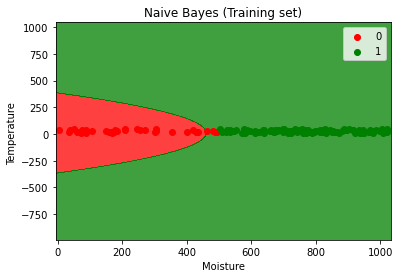

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Moisture')
plt.ylabel('Temperature ')
plt.legend()
plt.show()

## Visualisation of test set

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


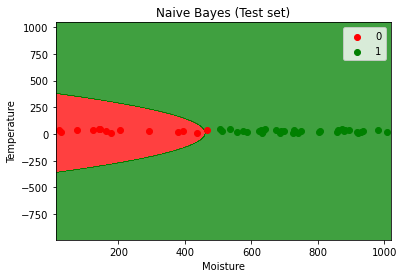

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Moisture')
plt.ylabel('Temperature')
plt.legend()
plt.show()